In [2]:
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

利用pandas来读取.csv文件 可以看得到具体数据了，每一列都是一个特征值。

In [3]:
# 读取spam.txt文件
df = pd.read_csv("/Users/shy/Downloads/chinahadoop-机器学习/SHY-Practise/data/spam.csv", encoding="latin")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


重命名两个列，主要的目的是为了可读性，因为V1和V2其实看不懂。

In [4]:
# 重命名v1，v2列。使得程序有更好的可读性。
df.rename(columns={'v1': 'Label', 'v2': 'Text'}, inplace=True)
df.head()

,Label,Text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


把字符串类型的标签直接改为0和1，这样就可以直接输入到模型中去。

In [5]:
df['numLabel'] = df['Label'].map({'ham': 0, 'spam': 1})
df.head()

,Label,Text,Unnamed: 2,Unnamed: 3,Unnamed: 4,numLabel
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,0
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,1
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,0


做一个统计，分别列出正常邮件和垃圾邮件的个数。 你会发现正常邮件个数要多于垃圾邮件个数

In [6]:
# 统计有多少个ham，多少个spam
print("# of ham : ", len(df[df.numLabel == 0]), "# of spam: ", len(df[df.numLabel == 1]))
print("# of total samples: ", len(df))

# of ham :  4825 # of spam:  747
# of total samples:  5572


统计一下文本长度的分布，并画出一个histogram。 通过这幅图我们可以看出大部分的文本长度在175个字之内

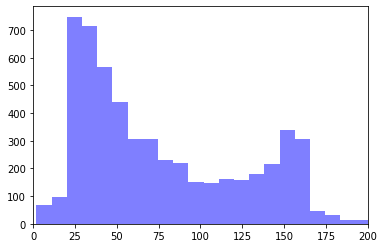

In [10]:
# 文本的长度统计，并画一个histogram
text_lens = [len(df.loc[i, 'Text']) for i in range(len(df))]
plt.hist(text_lens, 100, alpha=0.5, facecolor='blue')
plt.xlim([0, 200])
plt.show()

导入CountVectorizer, 主要用来把文本转换成向量的形式。

In [11]:
# 导入英文的停用词库
from sklearn.feature_extraction.text import CountVectorizer

# 构建文本的向量（基于词频的表示）
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df.Text)
y = df.numLabel

把样本分成训练和测试数据，其中测试数据按照20%来分配。

In [12]:
from sklearn.model_selection import train_test_split
# 将数据分为训练数据和测试数据
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)
print("训练数据中的样本个数: %s, 测试数据中的样本个数: %s" % (X_train.shape[0], X_test.shape[0]))

训练数据中的样本个数: 4457, 测试数据中的样本个数: 1115


利用朴素贝叶斯来训练模型，这里调用的是MultinomialNB而不是高斯朴素贝叶斯。具体调用的方式跟其他的模型没什么区别。之后打印出在测试数据上的准确率。

In [14]:
%%time
# 利用朴素贝叶斯做训练
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

clf = MultinomialNB(alpha=1.0, fit_prior=True)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("accuracy on test data: ", accuracy_score(y_test, y_pred))

accuracy on test data:  0.97847533632287
CPU times: user 3.73 ms, sys: 1.61 ms, total: 5.35 ms
Wall time: 3.74 ms


打印结果的混淆矩阵。混淆矩阵是分类问题中经常用到的评估技术。对于二分类问题最后打印出来的二乘二的矩阵。对角线的数为被正确分类的个数。通过混淆矩阵我们可以分析出哪几个类别被分类错的概率更大，之后就可以针对性的去调整就可以了。

In [16]:
# 打印混淆矩阵
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred, labels=[0,1])

array([[956,  14],
       [ 10, 135]])